# Credit Card Customer

A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry                          The Attributes Include:

Sl_No
Customer Key
AvgCreditLimit
TotalCreditCards
Totalvisitsbank
Totalvisitsonline
Totalcallsmade

In [35]:
import warnings
#%load_ext cudf.pandas
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.cluster.hierarchy as shc
from sklearn.mixture import GaussianMixture

In [3]:
df =pd.read_csv(r"Credit Card Customer Data.csv")

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<Axes: xlabel='Total_Credit_Cards'>

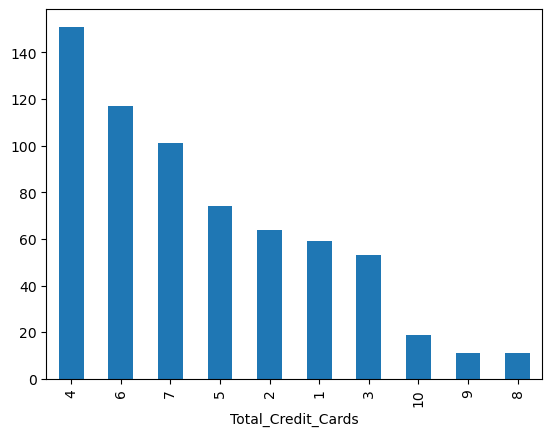

In [9]:
df['Total_Credit_Cards'].value_counts().plot.bar()

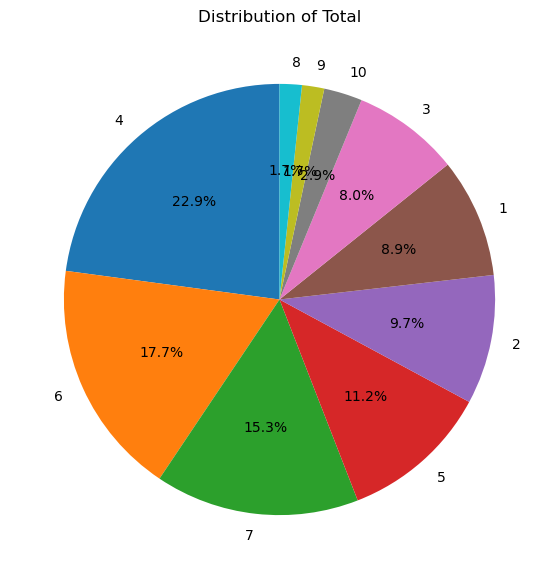

In [10]:
plt.figure(figsize=(7, 7))
data = df['Total_Credit_Cards'].value_counts()
data.plot.pie(autopct='%0.1f%%', startangle=90)
plt.title('Distribution of Total')
plt.ylabel('')  
plt.show()

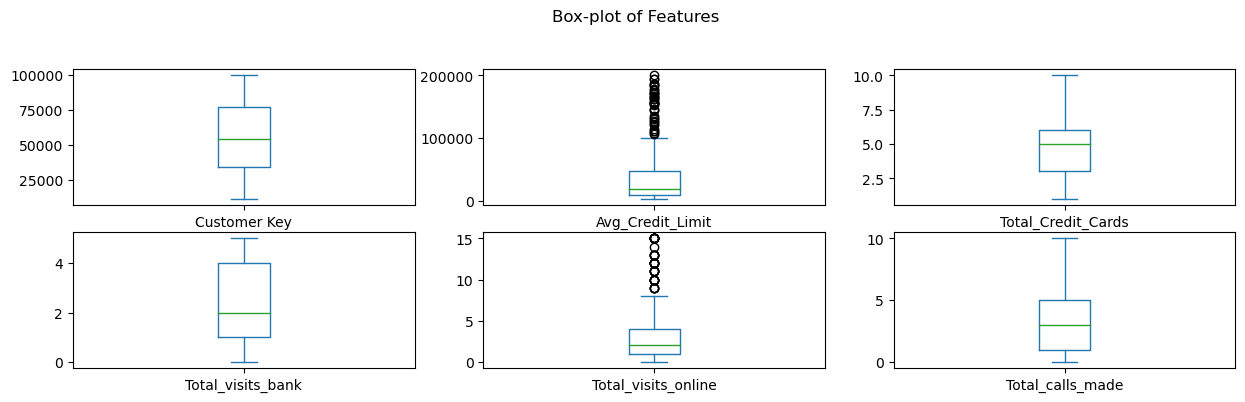

In [11]:
data = df[['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']]
data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 6))
plt.suptitle('Box-plot of Features')
plt.show()

In [12]:
Q1 = df["Avg_Credit_Limit"].quantile(0.25)
Q3 = df["Avg_Credit_Limit"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Avg_Credit_Limit"] < lower_bound) | (df["Avg_Credit_Limit"] > upper_bound)]
df = df[(df["Avg_Credit_Limit"] >= lower_bound) & (df["Avg_Credit_Limit"] <= upper_bound)]

In [13]:
Q1 = df["Total_visits_online"].quantile(0.25)
Q3 = df["Total_visits_online"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Total_visits_online"] < lower_bound) | (df["Total_visits_online"] > upper_bound)]
df = df[(df["Total_visits_online"] >= lower_bound) & (df["Total_visits_online"] <= upper_bound)]

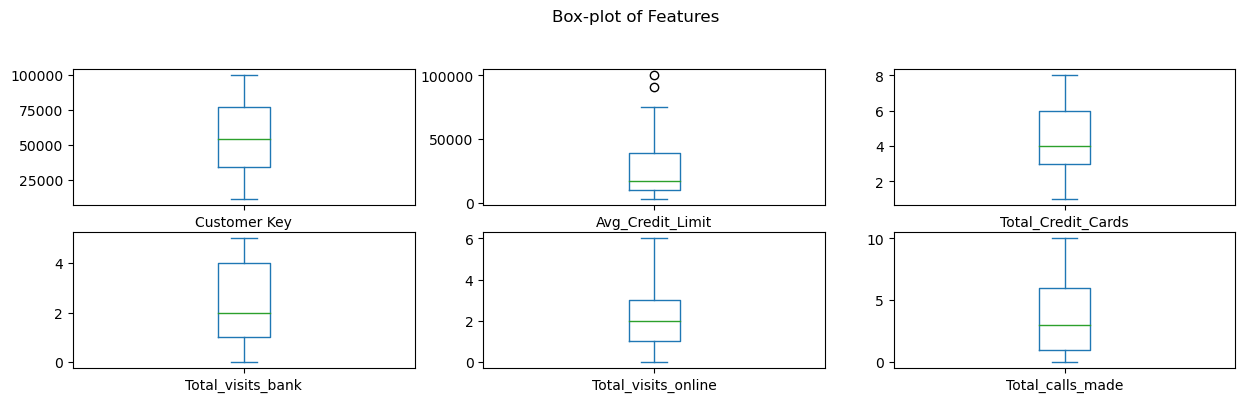

In [14]:
data = df[['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']]
data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 6))
plt.suptitle('Box-plot of Features')
plt.show()

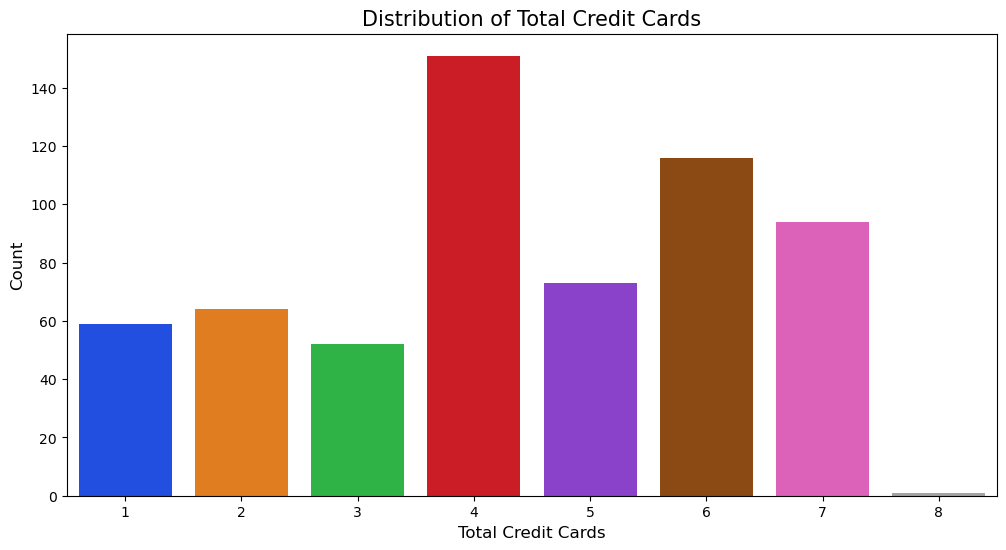

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='Total_Credit_Cards', ax=ax, palette='bright')

ax.set_title('Distribution of Total Credit Cards', fontsize=15)
ax.set_xlabel('Total Credit Cards', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

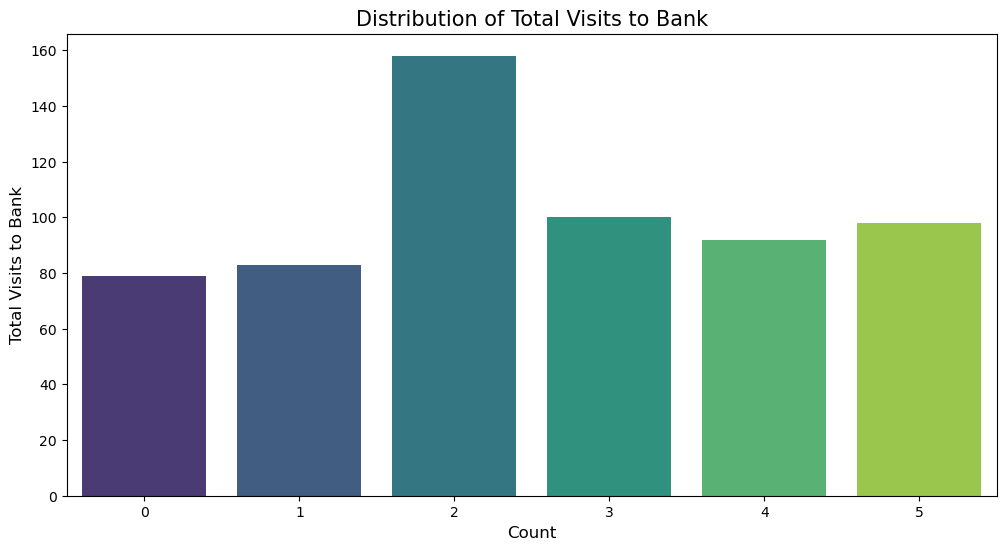

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='Total_visits_bank', ax=ax, palette='viridis')

ax.set_title('Distribution of Total Visits to Bank', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Total Visits to Bank', fontsize=12)

plt.show()

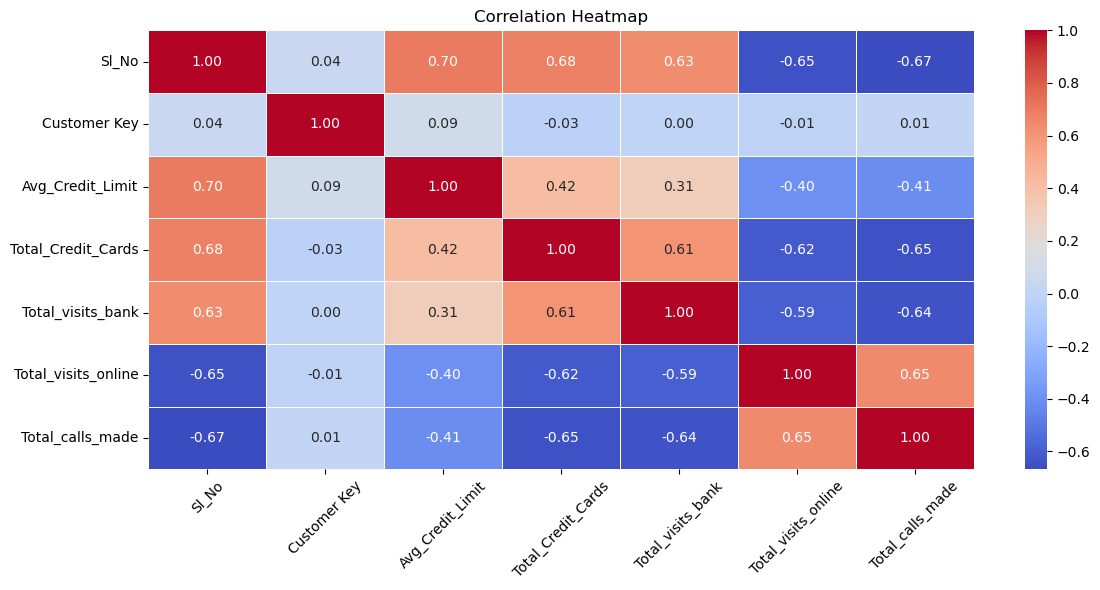

In [17]:
Corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

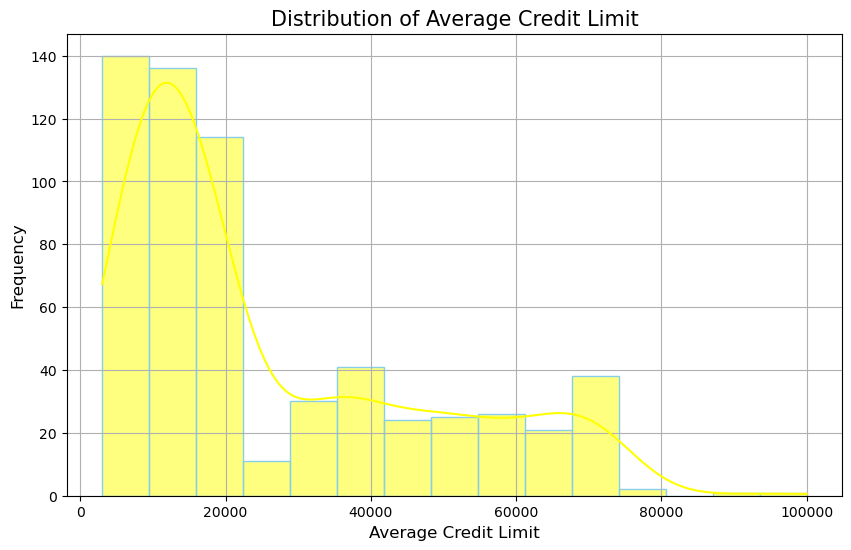

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x='Avg_Credit_Limit', kde=True, ax=ax, color='yellow', edgecolor='skyblue', linewidth=1)

ax.set_title('Distribution of Average Credit Limit', fontsize=15)
ax.set_xlabel('Average Credit Limit', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True)

plt.show()

# Models

In [20]:
df.drop(['Sl_No'],axis = 1, inplace =True)

In [21]:
x = data.iloc[:,[1,2]]
x

,Avg_Credit_Limit,Total_Credit_Cards
0,100000,2
2,50000,7
3,30000,5
5,20000,3
7,15000,3
...,...,...
608,47000,4
609,38000,4
610,39000,7
611,46000,7


In [22]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 3.55306938, -1.27016016],
       [ 1.15510921,  1.39420607],
       [ 0.19592514,  0.32845957],
       ...,
       [ 0.62755797,  1.39420607],
       [ 0.9632724 ,  1.39420607],
       [ 3.12143655,  1.92707931]])

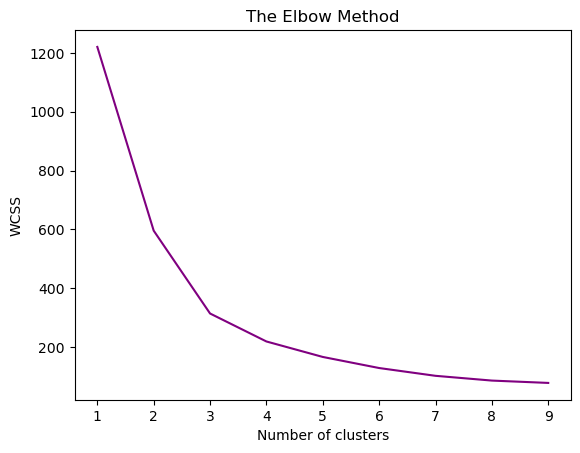

In [23]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, color = 'purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [25]:
labels = kmeans.labels_

In [26]:
# Check the length of the DataFrame
print("Length of DataFrame:", len(df))

# Check the length of the 'labels' array
print("Length of labels array:", len(labels))

# If the lengths don't match, consider slicing the DataFrame or 'labels' array
# to make them compatible. For example:
df = df.iloc[:len(labels)]
# Now try assigning the 'labels' array to the 'Cluster' column
df['Cluster'] = labels


Length of DataFrame: 610
Length of labels array: 610


In [27]:
kmeans.cluster_centers_

array([[1.23257576e+04, 2.42676768e+00],
       [3.97768595e+04, 1.03305785e+00],
       [6.57419355e+04, 9.13978495e-01]])

In [28]:
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
y_predict = kmeans.fit_predict(x)


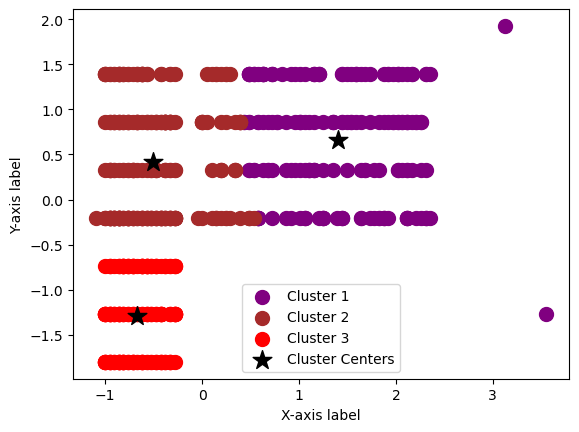

In [29]:
# Your code for scatter plots
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='purple', label='Cluster 1')  # For the first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='Brown', label='Cluster 2')  # For the second cluster
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='red', label='Cluster 3')  # For the third cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Cluster Centers', marker='*')
# Additional code for labels, legend, etc.
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()

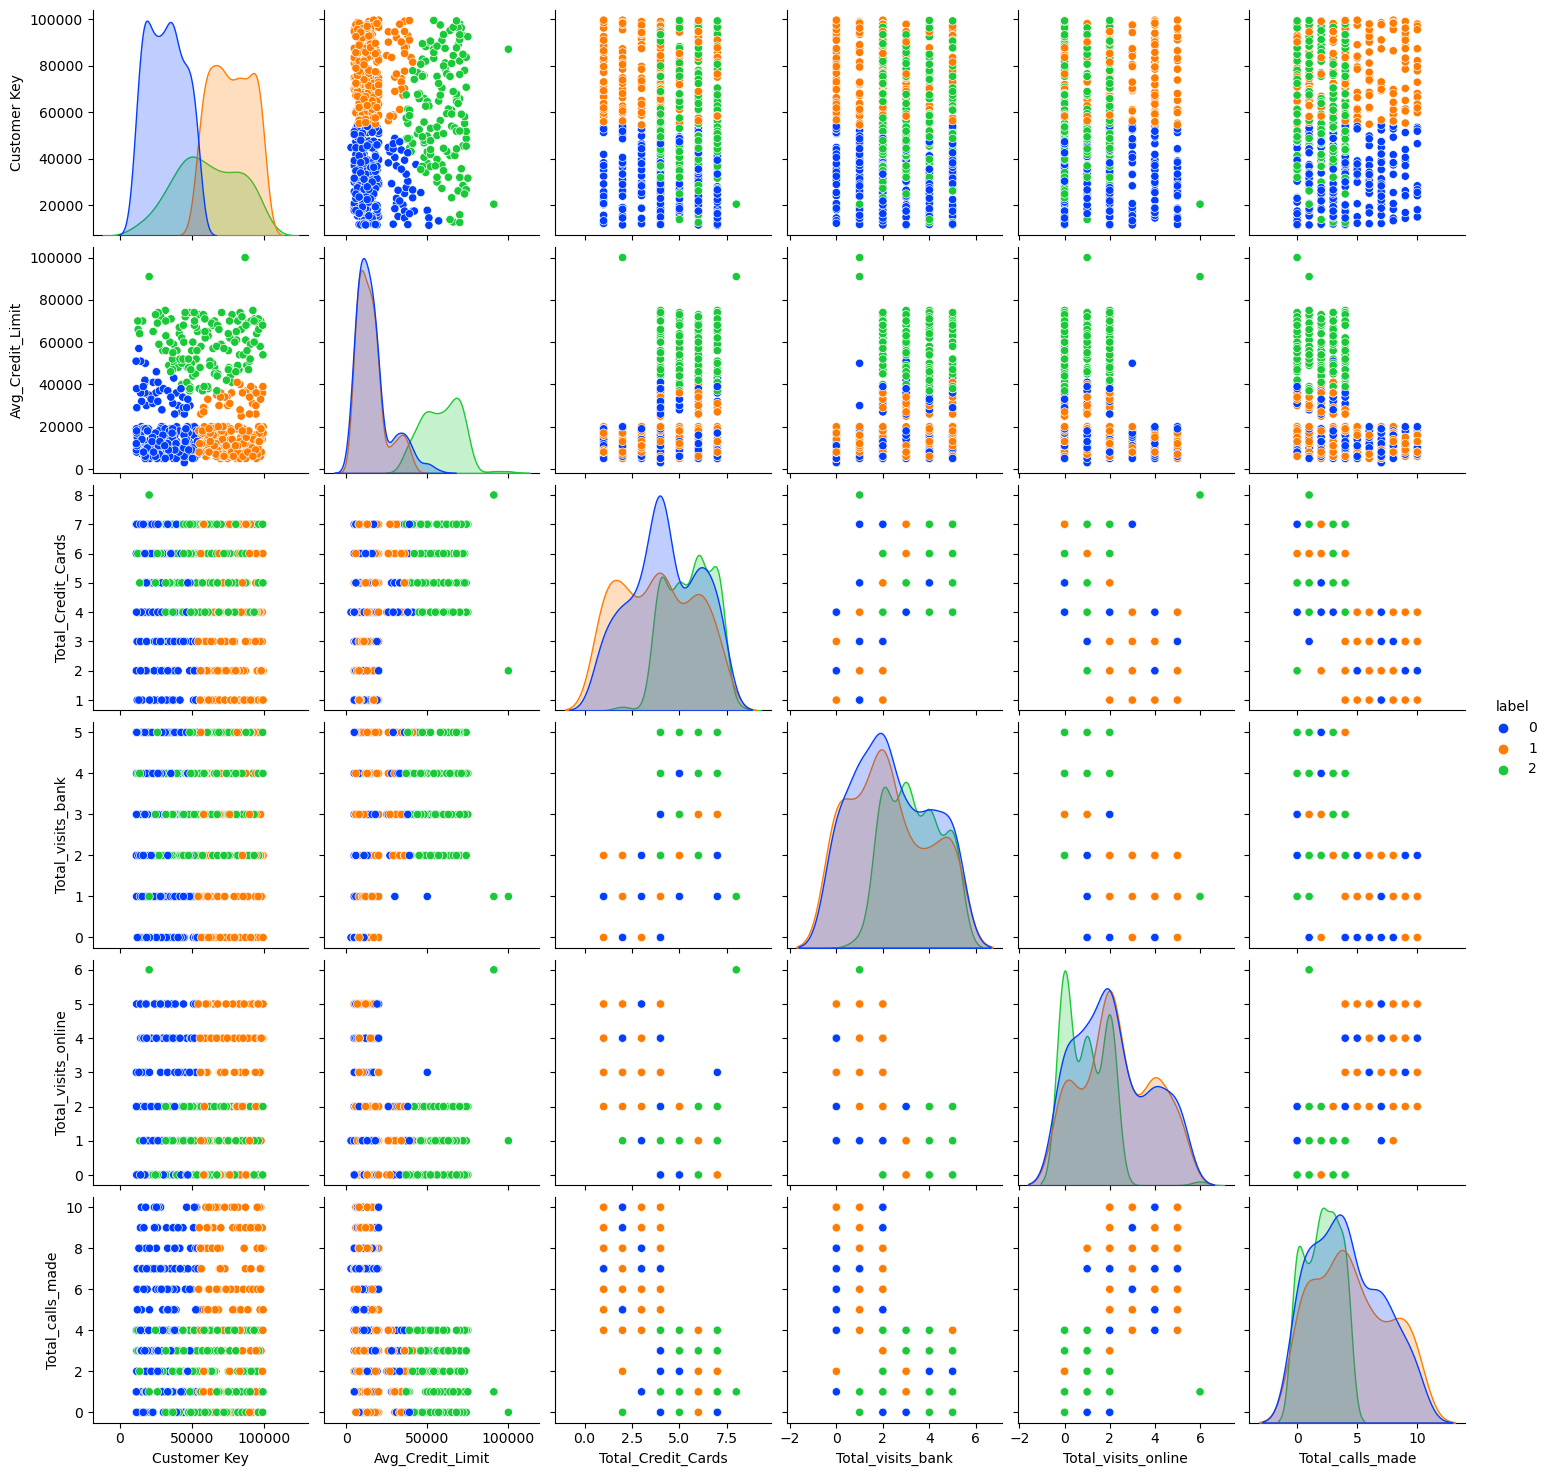

In [30]:
km1 = KMeans(n_clusters=3)
km1.fit(df)
y = km1.predict(df)
# Ensure lengths match or adjust if necessary
data = data.iloc[:len(y)]
# Add the 'label' column to the 'data' DataFrame
data['label'] = y

# Visualize the clustered data
sns.pairplot(data, hue='label', palette='bright')


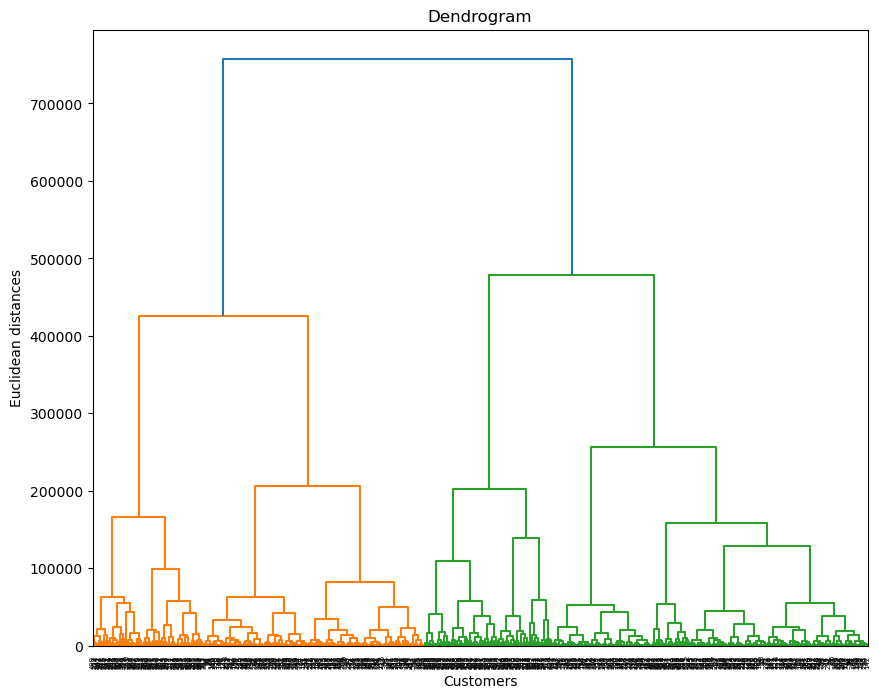

In [32]:
plt.figure(figsize=(10,8))
dend=shc.dendrogram(shc.linkage(df,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
print(df.head())

   Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         87073            100000                   2                  1   
2         17341             50000                   7                  1   
3         40496             30000                   5                  1   
5         58634             20000                   3                  0   
7         37376             15000                   3                  0   

   Total_visits_online  Total_calls_made  Cluster  
0                    1                 0        2  
2                    3                 4        1  
3                    1                 4        1  
5                    1                 8        0  
7                    1                 1        0  


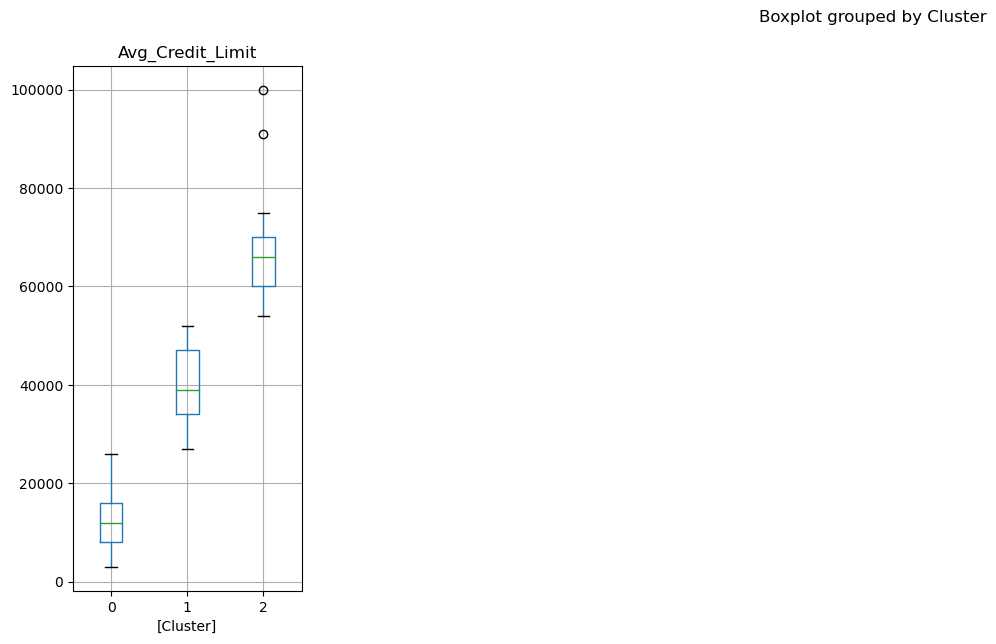

In [34]:
#visually compare the distribution of average credit limits across different clusters.
#notice patterns or trends in the data, such as whether certain clusters tend to have higher or lower average credit limits.

features_with_labels = ["Avg_Credit_Limit"]


df[features_with_labels + ['Cluster']].boxplot(by='Cluster', layout=(1, 6), figsize=(20, 7))
plt.show()


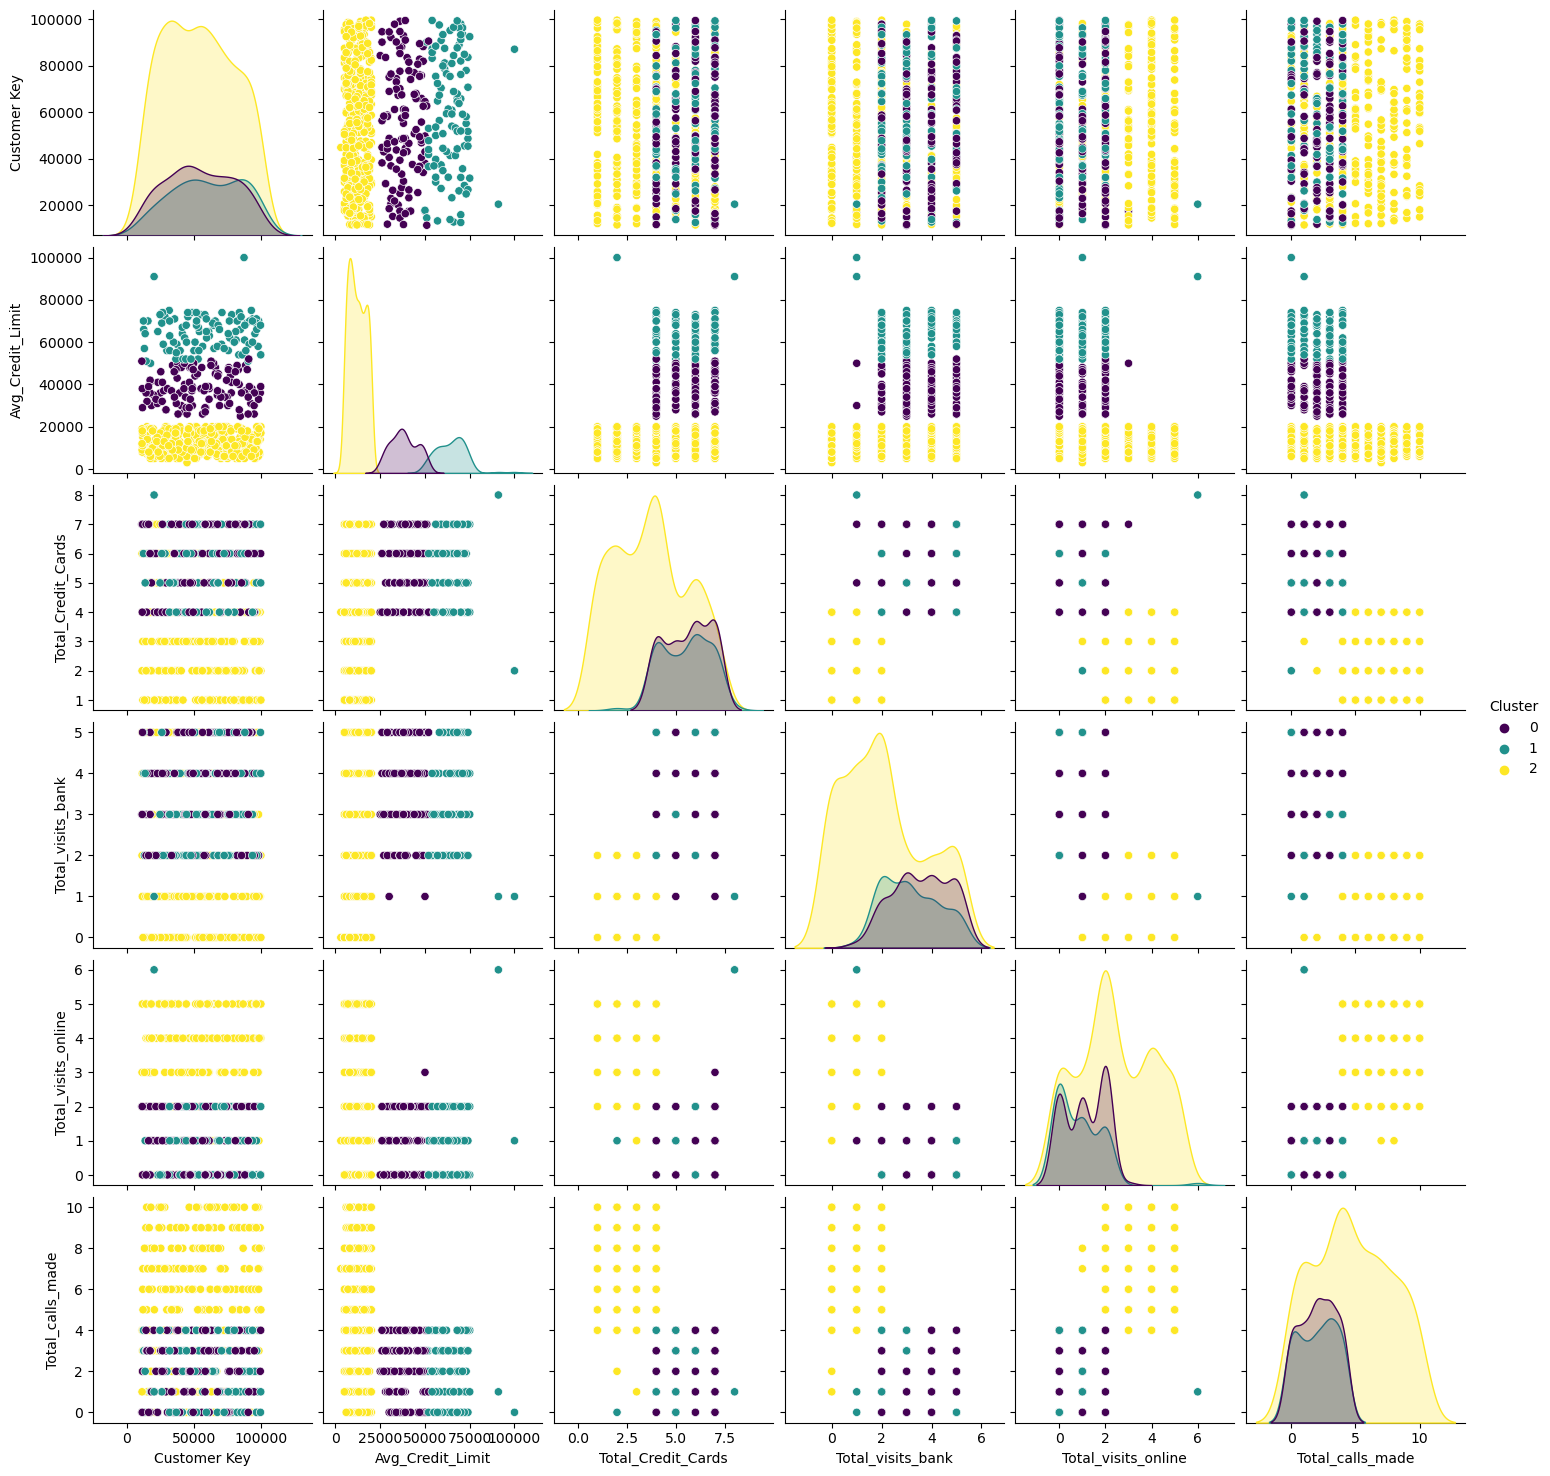

In [36]:
# Creating a Gaussian Mixture Model
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
# Fitting the model to your data
gmm.fit(X)
labels = gmm.predict(X)
# Adding the cluster labels to your original DataFrame
df['Cluster'] = labels
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


In [37]:
preprocessor = StandardScaler()

#  Clustering model
cluster_model = KMeans(n_clusters=3)  # Adjust the number of clusters as needed

# Create the pipeline
cluster_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('cluster_model', cluster_model)
])
cluster_pipeline.fit(X)
cluster_labels = cluster_pipeline.named_steps['cluster_model'].labels_
# Access other information if needed (e.g., centroids for KMeans)
centroids = cluster_pipeline.named_steps['cluster_model'].cluster_centers_
print("Cluster Labels:")
print(cluster_labels)
print("\nCentroids:")
print(centroids)

Cluster Labels:
[1 1 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 0 0 0 0 2 2 2 2 2 0 0 0 2 2 2 0 0 2 2 2 2 0 2 2 2 0 0 2 2 2 2
 2 2 0 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 0
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 0 0
 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 2 2 0 2 2 0 2 0 2
 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2
 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0
 0 1 1 1 

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 3
#  Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
#  Get cluster labels
labels = kmeans.labels_
#  Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5130446293156086


In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 3
# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_scaled)
# Get cluster labels
labels = gmm.predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4865349294252653
